In [109]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [110]:
# Load Data
citybikes = pd.read_csv('../data/sql_ready/citybikes.csv')
foursquare = pd.read_csv('../data/sql_ready/foursquare_data.csv')
yelp = pd.read_csv('../data/sql_ready/yelp_data.csv')
hamilton = pd.read_csv('../data/sql_ready/hamilton_pois.csv')
hamilton_city_combined = pd.read_csv('../data/sql_ready/hamilton_city_combined.csv')

# Print shapes
print(f"{citybikes.shape} -- Citybikes")
print(citybikes.columns, "\n")
print(f"{foursquare.shape} -- Foursquare")
print(foursquare.columns, "\n")
print(f"{yelp.shape} -- Yelp")
print(yelp.columns, "\n")
print(f"{hamilton.shape} -- Hamilton")
print(hamilton.columns, "\n")
print(f"{hamilton_city_combined.shape} -- Hamilton City Combined")
print(hamilton_city_combined.columns, "\n")

(190, 9) -- Citybikes
Index(['station_id', 'station_name', 'station_address', 'station_latitude',
       'station_longitude', 'available_bikes', 'empty_bike_slots', 'poi_count',
       'poi_avg_rating'],
      dtype='object') 

(666, 12) -- Foursquare
Index(['fsq_id', 'poi_name', 'poi_category_id', 'poi_rating',
       'poi_review_count', 'poi_latitude', 'poi_longitude', 'poi_address',
       'postal_code', 'yelp_id', 'poi_id', 'poi_category'],
      dtype='object') 

(528, 12) -- Yelp
Index(['yelp_id', 'poi_name', 'poi_category_id', 'poi_rating',
       'poi_review_count', 'poi_latitude', 'poi_longitude', 'poi_address',
       'postal_code', 'fsq_id', 'poi_id', 'poi_category'],
      dtype='object') 

(1194, 11) -- Hamilton
Index(['fsq_id', 'poi_name', 'poi_rating', 'poi_review_count', 'poi_latitude',
       'poi_longitude', 'poi_address', 'postal_code', 'yelp_id', 'poi_id',
       'poi_category'],
      dtype='object') 

(18675, 19) -- Hamilton City Combined
Index(['fsq_id', 'poi_nam

In [111]:
# Calculate the average distance of POIs from each station
avg_distances = hamilton_city_combined.groupby('station_id')['distance_from_station'].mean()

# Add the calculated average distances to the `citybikes` dataframe
citybikes = citybikes.merge(avg_distances.rename('poi_avg_distance_from_station'), 
                             on='station_id', 
                             how='left')

citybikes.describe()

,station_latitude,station_longitude,available_bikes,empty_bike_slots,poi_count,poi_avg_rating,poi_avg_distance_from_station
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,43.258057,-79.883607,4.073684,7.115789,98.189474,3.560988,978.851438
std,0.007443,0.034335,4.158862,5.951947,15.034208,0.337148,584.173215
min,43.235056,-79.953754,0.000000,0.000000,8.000000,2.459459,436.579847
25%,43.252676,-79.917150,1.000000,3.000000,93.000000,3.410032,701.072102
50%,43.258868,-79.880472,3.000000,6.000000,102.000000,3.547059,812.229819
75%,43.262716,-79.860139,5.750000,9.000000,109.000000,3.821527,950.649359
max,43.289479,-79.810159,21.000000,29.000000,116.000000,4.120755,4289.505587


In [112]:
citybikes.columns

Index(['station_id', 'station_name', 'station_address', 'station_latitude',
       'station_longitude', 'available_bikes', 'empty_bike_slots', 'poi_count',
       'poi_avg_rating', 'poi_avg_distance_from_station'],
      dtype='object')

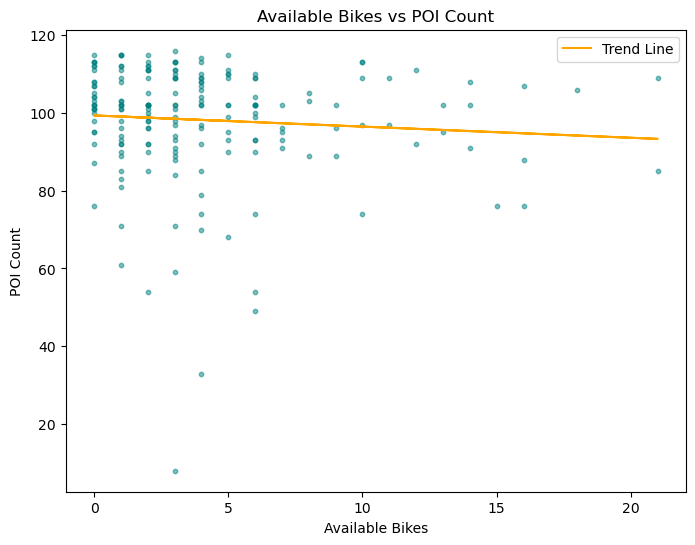

In [113]:
# Figure Size
plt.figure(figsize=(8, 6))

# Plot `available_bikes` vs `poi_count`
plt.scatter(citybikes['available_bikes'],
            citybikes['poi_count'],
            alpha=0.5,
            s=10,
            color='teal')

# Fit and plot trend line
coeffs = np.polyfit(citybikes['available_bikes'],
                    citybikes['poi_count'],
                    deg=1)
trend_line = np.polyval(coeffs,
                        citybikes['available_bikes'])
plt.plot(citybikes['available_bikes'],
         trend_line,
         color='orange',
         label='Trend Line')

# Labels and legend
plt.xlabel('Available Bikes')
plt.ylabel('POI Count')
plt.title('Available Bikes vs POI Count')
plt.legend()

plt.savefig('../images/available_bikes_vs_poi_count.png', dpi=300, bbox_inches='tight')
plt.show()

**Interpretation of the Chart: Available Bikes vs POI Count**

Scatter Plot Distribution:
- Most of the data points are clustered where the number of available bikes is low (0–5 bikes).
- The POI count generally stays high (around 80–120) regardless of the number of available bikes.

Trend Line:
- The orange trend line shows a slightly negative slope, indicating a very weak inverse relationship between available_bikes and poi_count.
- As the number of available bikes increases, the poi_count tends to decrease slightly, but this effect is negligible.

Key Observations:
- High POI counts appear even when very few bikes (or none) are available at stations. This suggests that stations with low bike availability may be located in high-demand areas near many POIs.
- The lack of a strong trend indicates that bike availability is not a significant predictor of poi_count.
- There are some stations with higher bike availability (10–20 bikes) and relatively lower POI counts, but these are outliers and not representative of the majority of data points.

Implications:
- Stations with low bike availability might reflect high traffic or high turnover, which aligns with locations having many POIs (e.g., popular areas or commercial zones).
- Stations with more available bikes do not necessarily correlate with high POI counts, indicating bike availability could be influenced by other factors (e.g., usage patterns, station demand).

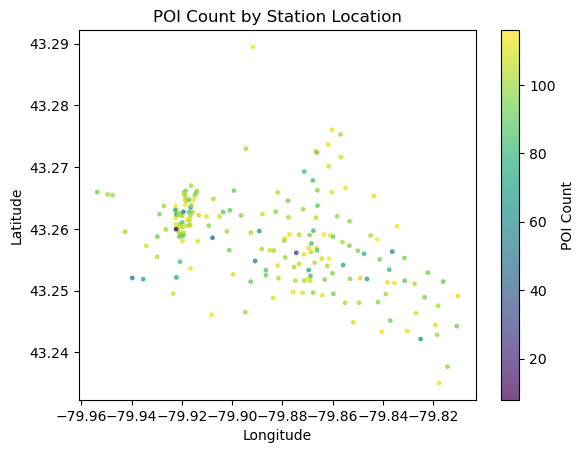

In [114]:
# Heatmap of bike stations by latitude, longitude, and POI count
plt.scatter(citybikes['station_longitude'],
            citybikes['station_latitude'], 
            c=citybikes['poi_count'],
            cmap='viridis',
            s=6,
            alpha=0.7)

plt.colorbar(label='POI Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('POI Count by Station Location')

plt.savefig('../images/poi_count_by_station_location.png', dpi=300, bbox_inches='tight')
plt.show()

### **Interpretation of the Chart: POI Count by Station Location**

Geographical Distribution:

- The scatter plot shows the geographic distribution of bike stations based on longitude and latitude.
- Each point represents a station, and its color intensity corresponds to the POI count near that station.

POI Count Patterns:
- Stations with higher POI counts (yellow/bright green points) are clustered around specific areas, particularly near longitude ~ -79.90 and latitude ~ 43.26.
- These areas likely correspond to high-density commercial zones, downtown areas, or regions with many Points of Interest.
- As you move away from this cluster, POI counts generally decrease (darker green and purple points), suggesting stations in less dense or less popular areas.

Spatial Trends:
- The concentration of higher POI counts suggests spatial clustering. Some stations serve areas with significantly higher activity, while others (more dispersed stations) are in lower-POI regions.
- There may be an urban core or downtown effect where POIs are denser compared to the outskirts.

Key Observations:
- The yellow points are concentrated in the center-left part of the plot, indicating that specific regions are more active and dense with POIs.
- Stations further from this central cluster tend to have lower POI counts (lighter purple tones).

#### **Implications:**

Station Placement:
- High POI regions may benefit from increased bike availability due to higher demand.
- Stations in less dense areas might require a different strategy (e.g., fewer bikes or relocation).

Future Analysis:
- Analyze if bike availability or empty slots correlate with these high POI regions.
- Investigate user traffic at stations in high-density vs low-density POI regions.

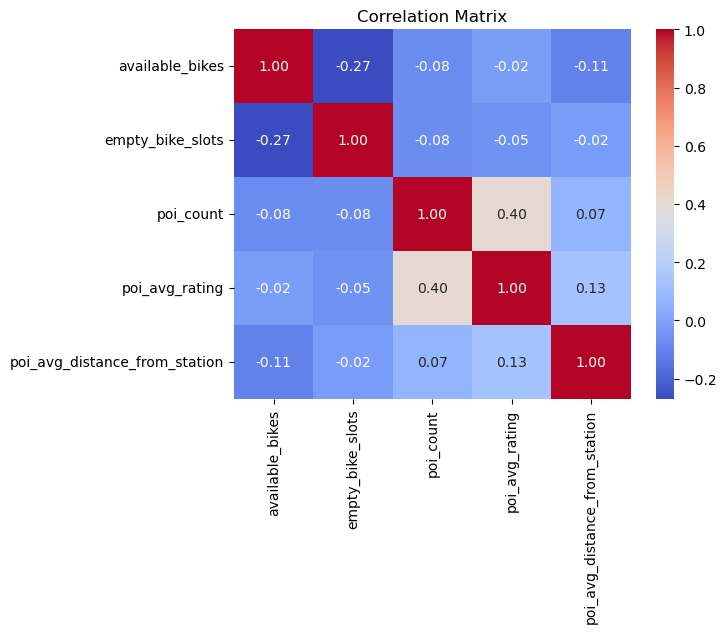

In [115]:
# Correlation matrix
corr_matrix = citybikes[['available_bikes', 'empty_bike_slots', 'poi_count', 
                         'poi_avg_rating', 'poi_avg_distance_from_station']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.title('Correlation Matrix')
plt.savefig('../images/correlation_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

### **Interpretation of the Correlation Matrix**

**Key Observations**

`poi_count` and `poi_avg_rating`:
- Correlation: 0.40 (Moderate Positive Correlation)
- POI counts are positively associated with higher average ratings. This indicates that locations with more Points of Interest (POIs) tend to have higher average POI ratings.

`available_bikes` and `empty_bike_slots`:
- Correlation: -0.27 (Weak Negative Correlation)
- There is a weak inverse relationship between available bikes and empty slots. This makes sense because as the number of available bikes increases, fewer slots remain empty.

`available_bikes` and `poi_count`:
- Correlation: -0.08 (Very Weak Negative Correlation)
- The relationship between the number of available bikes and POI counts is minimal. This aligns with earlier observations that bike availability does not strongly predict POI density.

`empty_bike_slots` and `poi_count`:
- Correlation: -0.08 (Very Weak Negative Correlation)
- Similar to available_bikes, empty slots have little to no relationship with POI count.

`poi_avg_distance_from_station`:
- Weak correlations with all other variables, such as available_bikes (-0.11) and poi_count (0.07). This suggests the average distance of POIs from a station does not significantly impact bike availability or POI density.

**Key Insights**

POI Count and Ratings:
- The most meaningful relationship is between poi_count and poi_avg_rating (0.40). This suggests that areas with more POIs tend to have higher average ratings, possibly indicating more desirable or popular locations.

Bike Availability:
- available_bikes and empty_bike_slots show weak or no significant relationships with poi_count or POI ratings. This indicates that the placement of bikes might be driven by other factors (e.g., usage demand, station traffic patterns) rather than POI density.

Spatial Factors:
- The weak correlations involving poi_avg_distance_from_station suggest that POI proximity has minimal influence on the other metrics.

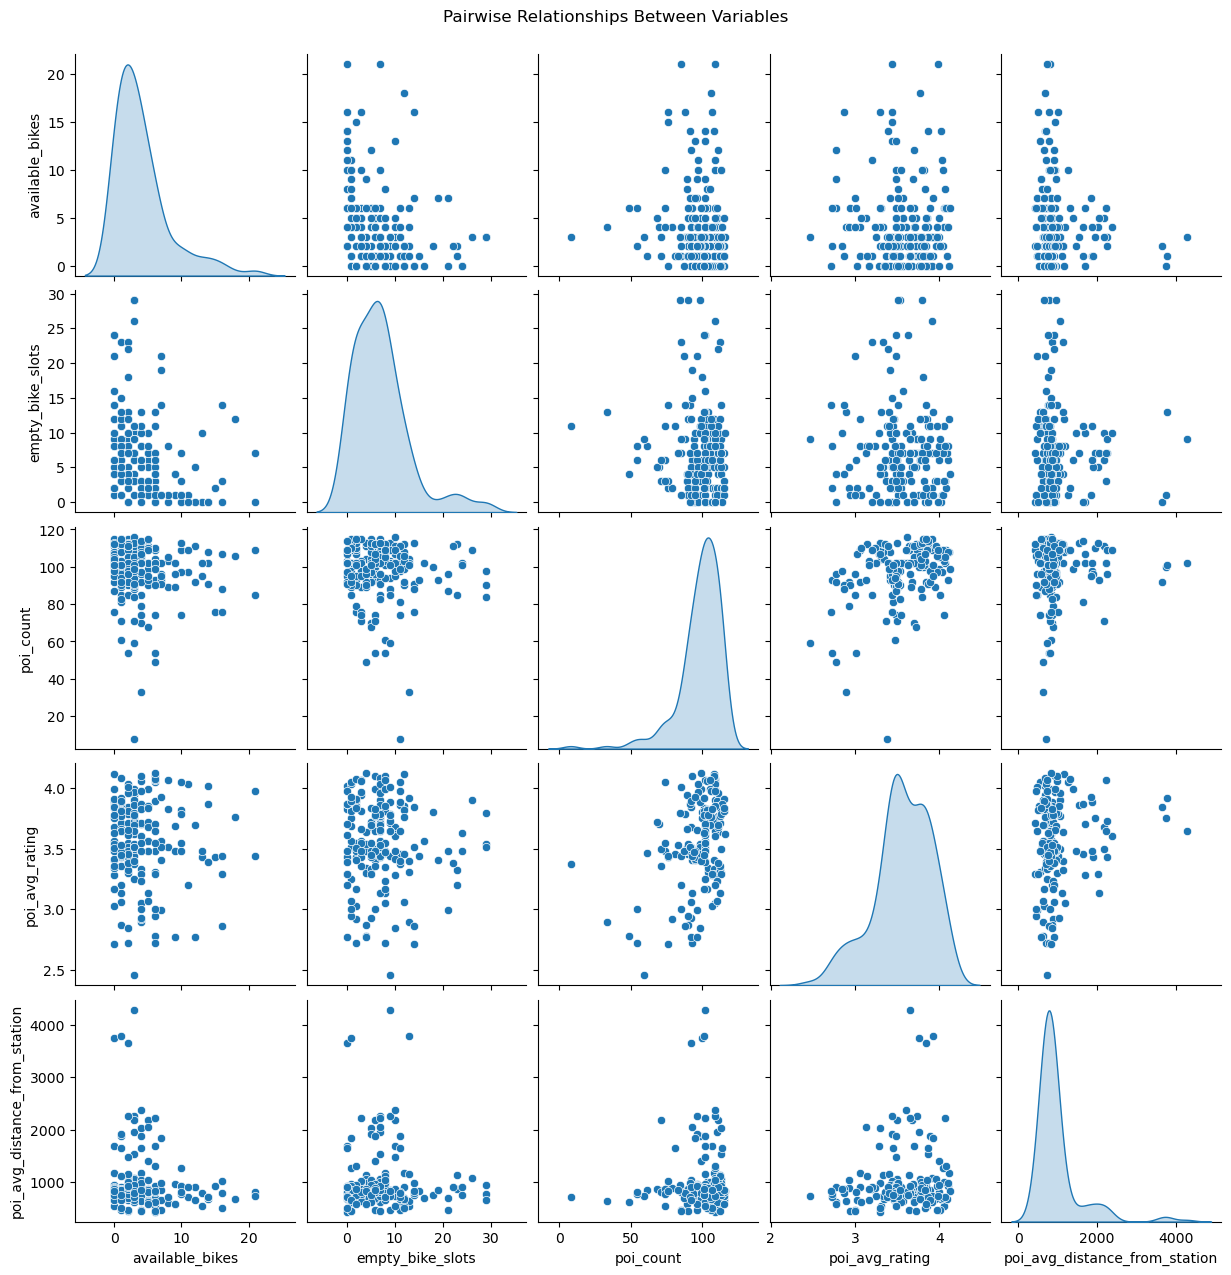

In [116]:
# Visualize pairwise relationships between variables
sns.pairplot(citybikes[['available_bikes', 'empty_bike_slots', 'poi_count', 
                        'poi_avg_rating', 'poi_avg_distance_from_station']], diag_kind='kde')

plt.suptitle('Pairwise Relationships Between Variables', y=1.02)

plt.savefig('../images/pairwise_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

### Interpretation of Pairwise Relationships

#### Key Observations
available_bikes:
- The distribution is skewed to the right, indicating that most stations have fewer bikes available (close to 0–5 bikes).
- There is no clear relationship between available_bikes and other variables like poi_count, poi_avg_rating, or poi_avg_distance_from_station. The scatter plots appear random with no visible trends.

empty_bike_slots:
- The distribution is similarly right-skewed, indicating most stations have few empty slots (close to 0–5 slots).
- Like available_bikes, empty_bike_slots does not show any significant trends with other variables.

poi_count:
- The distribution is heavily clustered near higher values (around 100 POIs).
Relationship with poi_avg_rating:
- A positive trend is noticeable: higher poi_count tends to be associated with higher poi_avg_rating. This aligns with the earlier correlation matrix (0.40).
- Relationship with poi_avg_distance_from_station:
  - No obvious pattern is observed; POI counts seem independent of POI distances.

poi_avg_rating:
- The distribution is approximately normal, centered around values between 3.5–4.5.
- Relationship with poi_count:
  - As mentioned earlier, higher poi_count tends to correlate with slightly higher ratings, suggesting high POI density in popular or highly rated areas.

poi_avg_distance_from_station:
- The distribution is right-skewed, with most distances concentrated at lower values (~0–1000 units).
- There is no visible trend between poi_avg_distance_from_station and other variables, suggesting that POI distance does not significantly relate to bike availability, empty slots, or POI count.

#### Key Insights
poi_count and poi_avg_rating:
- The strongest pairwise relationship observed is between poi_count and poi_avg_rating, reinforcing that regions with more POIs often have higher-rated POIs.

Lack of Relationships with available_bikes and empty_bike_slots:
- Both available_bikes and empty_bike_slots do not exhibit clear relationships with any other variables, indicating their independence from POI-related metrics.

Skewed Distributions:
- Both available_bikes and empty_bike_slots show skewed distributions, which may require data transformations (e.g., log scaling) if included in future models.

# Build a regression model.

In [117]:
# Define independent variables (X) and dependent variable (y)
X = citybikes[['available_bikes', 'empty_bike_slots', 
               'poi_avg_rating', 'poi_avg_distance_from_station']]
X = sm.add_constant(X)  # Add intercept to the model

y = citybikes['poi_count']  # Target variable

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

Provide model output and an interpretation of the results. 

In [118]:
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              poi_count   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     9.783
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           3.36e-07
Time:                        19:29:25   Log-Likelihood:                -765.83
No. Observations:                 190   AIC:                             1542.
Df Residuals:                     185   BIC:                             1558.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Interpretation of the OLS Regression Results

#### Key Model Metrics
1. R-squared: 0.175
  - The model explains 17.5% of the variance in poi_count. This is relatively low, suggesting that the predictors don’t fully explain the target variable.
2. Adj. R-squared: 0.157
  - Adjusted for the number of predictors, indicating similar model performance.
3. F-statistic: 9.783 (p-value = 3.36e-07)
  - The overall model is statistically significant, meaning at least one predictor contributes to explaining poi_count.

#### Individual Coefficients
**Intercept (`const`)**
Coefficient: 37.7003
p-value: 0.001
- When all predictors are zero, the expected poi_count is 37.7

**`available_bikes`**
Coefficient: -0.3312
P-value: 0.191
- Weak negative relationship with `poi_count` (not statistically significant).

**`empty_bike_slots`**
Coefficient: -0.2006
P-value: 0.255
- Weak negative relationship with `poi_count` (not statistically significant).

**`poi_avg_rating`**
Coefficient: 17.7282
P-value: 0.000
- A strong positive relationship: a one-unit increase in average rating is associated with 17.73 more POIs. Statistically significant.

**`poi_avg_distance_from_station`**
Coefficient: 0.0001
P-value: 0.937
- Negligible relationship (practically zero). Not statistically significant.

# Stretch

How can you turn the regression model into a classification model?

> To convert the regression model into a classification model, we need to redefine the dependent variable as a categorical variable rather than a continuous one. The classification model will then predict which category a data point belongs to instead of estimating a numeric value.

In [119]:
# Define bins based on percentiles
citybikes['poi_count_class'] = pd.qcut(citybikes['poi_count'], 
                                       q=[0, 0.33, 0.66, 1], 
                                       labels=[0, 1, 2])  # 0: Low, 1: Mid, 2: High

# Verify class distribution
citybikes['poi_count_class'].value_counts()

poi_count_class
0    66
2    63
1    61
Name: count, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Independent variables (X) and target variable (y)
X = citybikes[['available_bikes', 'empty_bike_slots', 
               'poi_avg_rating', 'poi_avg_distance_from_station']]
y = citybikes['poi_count_class']  # Multi-class target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7 6 1]
 [7 4 1]
 [3 3 6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.50      0.45        14
           1       0.31      0.33      0.32        12
           2       0.75      0.50      0.60        12

    accuracy                           0.45        38
   macro avg       0.49      0.44      0.46        38
weighted avg       0.49      0.45      0.46        38



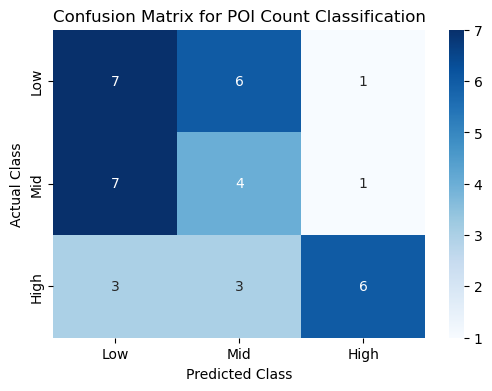

In [122]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Mid', 'High'], 
            yticklabels=['Low', 'Mid', 'High'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for POI Count Classification')

plt.savefig('../images/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Evaluation of the Multi-Class Classification Results

1. Confusion Matrix: Provides insights into how well the model classifies each class (0: Low, 1: Mid, 2: High POI counts):
    - Class 0 (Low POI Count):
      - 7 instances correctly classified.
      - 6 instances misclassified as Class 1.
      - 1 instance misclassified as Class 2.

    - Class 1 (Mid POI Count):
      - Only 4 instances correctly classified.
      - 7 instances misclassified as Class 0.
      - 1 instance misclassified as Class 2.

    - Class 2 (High POI Count):
      - 6 instances correctly classified.
      - 3 instances misclassified as Class 0.
      - 3 instances misclassified as Class 1.
  
2. Classification Report
    - Class 0 (Low):
      - Precision: 41% → Only 41% of predicted "Low" values are correct.
      - Recall: 50% → The model correctly identifies 50% of the actual "Low" values.
      - F1-Score: 0.45 → Moderate performance.

    - Class 1 (Mid):
      - Precision: 31% → Low precision indicates significant misclassification.
      - Recall: 33% → The model only identifies 33% of the "Mid" class correctly.
      - F1-Score: 0.32 → Weak performance for this class.

    - Class 2 (High):
      - Precision: 75% → High precision indicates predictions for "High" are relatively reliable.
      - Recall: 50% → However, the model only identifies 50% of the actual "High" values.
      - F1-Score: 0.60 → Best-performing class but with room for improvement.

#### Overall Metrics:
**Accuracy:** 45% → The model is correct only 45% of the time.

**Macro Average F1-Score:** 0.46 → Balances precision and recall for all classes.

**Weighted Average:** 0.46 → Slightly biased toward larger classes.

#### Key Insights
Performance Across Classes:
- The model struggles with Class 1 (Mid POI Count), likely because it overlaps with Classes 0 and 2.
- Class 2 (High POI Count) shows the best performance in terms of precision, but its recall is still low.

Imbalance in Classification:
- Although the support (number of samples) for each class is roughly equal, the classifier fails to distinguish mid-range POI counts effectively.
- This may indicate that the features (available_bikes, empty_bike_slots, poi_avg_rating, etc.) do not provide enough information to differentiate the classes clearly.

Low Accuracy (45%):
- The accuracy is only slightly better than random guessing (1/3 ≈ 33%). This suggests that the current features and model are insufficient for robust classification.